# Linguagem Natural parte 1 Introdução a NLP com análise de sentimento

## Objetivos
* Aprenda conceitos fundamentais do Processamento de Linguagem Natural.
* Realize Análise de Sentimento de modo automatizado.
* Uma arquitetura para classificação de sentimentos.
* Como criar visualizações para facilitar a análise de dados textuais.
* Comece a utilizar o NLTK uma das principais bibliotecas python para PLN.
* Aprenda boas práticas voltadas ao PLN.

Link:https://cursos.alura.com.br/course/introducao-a-nlp-com-analise-de-sentimento

## Importando as bibliotecas necessárias

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import tokenize, ngrams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

## Carregando os dados e fazendo analise explorátorio dos dados

link do dataset: https://www.kaggle.com/luisfredgs/imdb-ptbr

In [2]:
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
print(f'O dataset possui {df.shape[0]} observações e {df.shape[1]} atributos')

O dataset possui 49459 observações e 4 atributos


In [4]:
X = df.text_pt
y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train, y_train)
acuracia = regressao_logistica.score(X_test, y_test)
print(f'Acurácia: {acuracia:0.2%}')

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [8]:
classificacao = df['sentiment'].replace(['neg', 'pos'], [0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [9]:
df['classificacao'] = classificacao
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [10]:
texto_exemplo = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto_exemplo)

In [11]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [12]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_esparsa.head()

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [11]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.text_pt)
bag_of_words.shape

(49459, 50)

In [13]:
def classificar_texto(df, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(df[coluna_texto])

    X = bag_of_words
    y = df[coluna_classificacao]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_train, y_train)
    regressao_logistica.score(X_test, y_test)
    
    return regressao_logistica.score(X_test, y_test)

In [14]:
acuracia_sem_tratamento = classificar_texto(df, 'text_pt', 'classificacao')

print(f'Acurácia: {acuracia_sem_tratamento:0.2%}')

Acurácia: 65.83%


In [15]:
todas_as_palavras = ' '.join([palavra for palavra in df.text_pt])
len(todas_as_palavras)

63448424

In [59]:
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(todas_as_palavras)

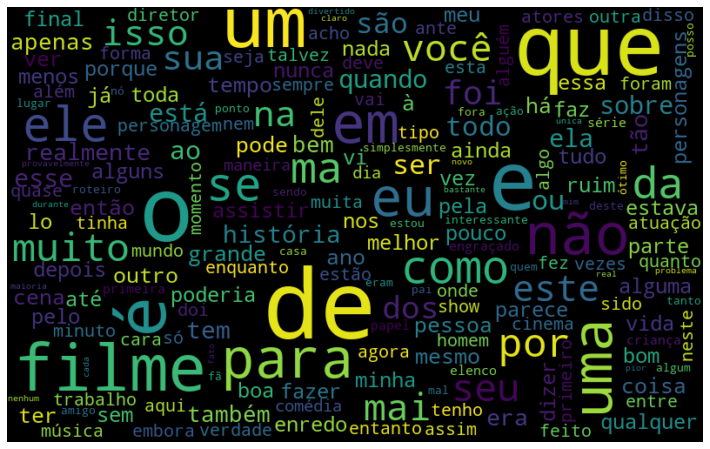

In [60]:
fig, ax = plt.subplots(figsize=(14,8))
ax.imshow(nuvem_palavras, interpolation='bilinear')
ax.axis('off')
plt.show()

In [16]:
def gera_nuvem_palavra(df, coluna_texto, sentimento):
    textos_filtrados = df.query("sentiment == @sentimento")
    todas_palavras = ' '.join([palavra for palavra in textos_filtrados[coluna_texto]])
    
    nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(todas_palavras)
    
    fig, ax = plt.subplots(figsize=(14,8))
    ax.imshow(nuvem_palavras, interpolation='bilinear')
    ax.axis('off')
    plt.show()

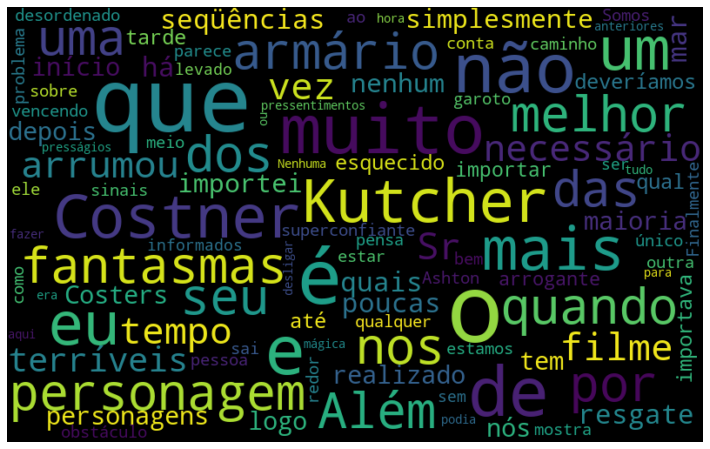

In [125]:
gera_nuvem_palavra(df, 'text_pt', 'pos')

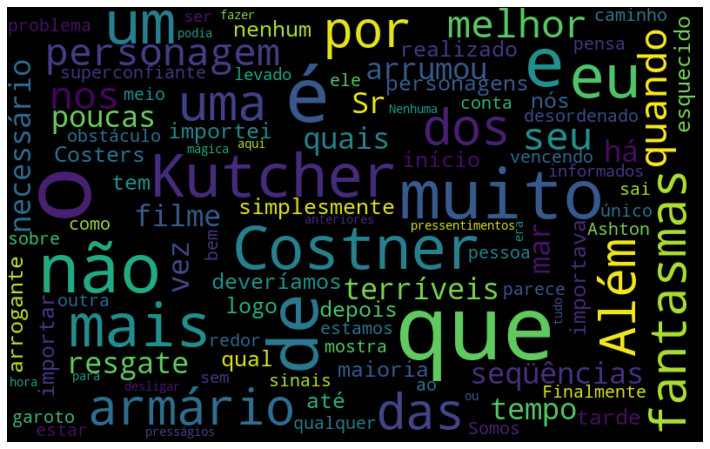

In [126]:
gera_nuvem_palavra(df, 'text_pt', 'neg')

In [15]:
frase = ['Um filme ruim', 'Um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Um filme ruim': 1, 'Um filme bom': 1})

In [17]:
frase = 'Bem vindo ao mundo do PLN'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']

In [18]:
todas_as_palavras = ' '.join([palavra for palavra in df.text_pt])

token_frase = token_espaco.tokenize(todas_as_palavras)
frequencia = nltk.FreqDist(token_frase)

In [19]:
df_frequencia = pd.DataFrame({'palavra': frequencia.keys(),
                               'frequência': frequencia.values()})
df_frequencia.nlargest(columns='frequência', n=10)

,palavra,frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [20]:
def pareto(df, coluna_texto, quantidade):
    todas_as_palavras = ' '.join([palavra for palavra in df[coluna_texto]])
    
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_as_palavras)
    frequencia = nltk.FreqDist(token_frase)
    
    df_frequencia = pd.DataFrame({'palavra': frequencia.keys(),
                               'frequência': frequencia.values()})
    df_frequencia = df_frequencia.nlargest(columns='frequência', n=quantidade)
    total = df_frequencia['frequência'].sum()
    df_frequencia['porcentagem'] = df_frequencia['frequência'].cumsum() / total * 100    
    
    fig, ax1 = plt.subplots(figsize=(14,8))
    sns.barplot(x='palavra', y='frequência', data=df_frequencia, ax=ax1, color='gray')
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x='palavra', y='porcentagem', data=df_frequencia, ax=ax2, color='red')
    ax2.set_ylabel('Contagem', fontsize=14)
    plt.show()

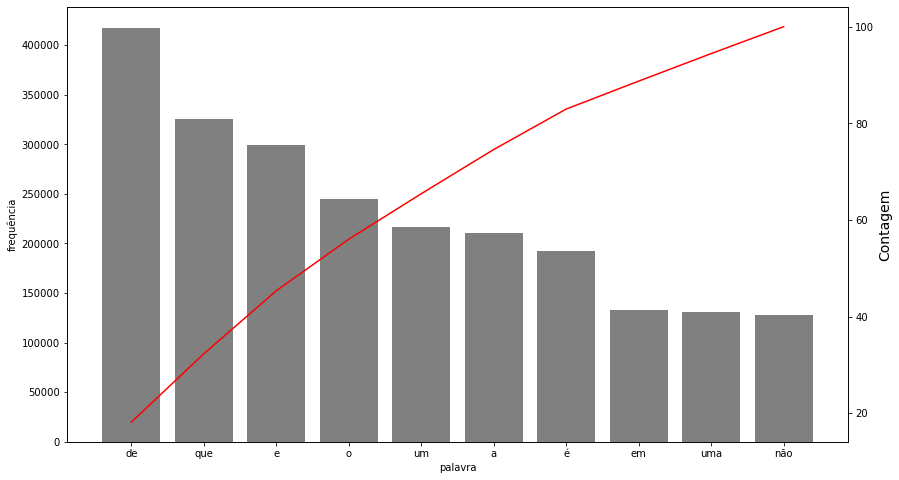

In [20]:
pareto(df, 'text_pt', 10)

In [21]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
len(palavras_irrelevantes)

204

In [22]:
frase_processada = []

for frase in df.text_pt:
    nova_frase = []
    palavras_texto = token_espaco.tokenize(frase)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df['tratamento_1'] = frase_processada

In [23]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [24]:
classificar_texto(df, 'tratamento_1', 'classificacao')

0.6607359482410028

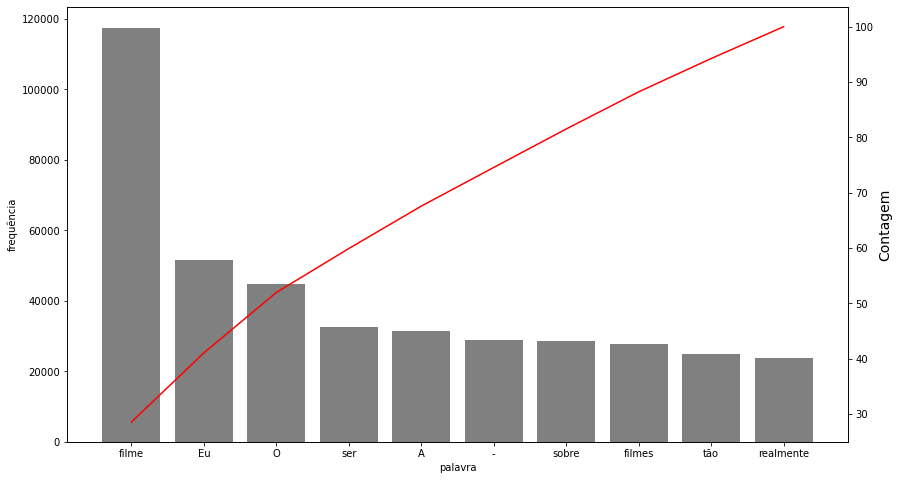

In [25]:
pareto(df, 'tratamento_1', 10)

# Linguagem Natural parte 2: Continuando com a análise de sentimento

## Objetivos
* Aprenda conceitos do Processamento de Linguagem Natural.
* Realize Análise de Sentimento de modo automatizado.
* Melhore os resultados de classificação normalizando os textos.
* Aprenda como usar TF-IDF e Ngrams para melhorar a classificação.
* Como a normalização dos textos melhora a visualização dos dados textuais.
* Avance na utilização da biblioteca NLTK.
* Aprenda a utilizar recursos do SKlearn para otimizar a classificação.

link: https://cursos.alura.com.br/course/nlp-com-analise-de-sentimento

### Realizando a tokenização das palavras de acordo com a pontuação, isso auxilia pois diferencia palavras que possuem virgula e ponto final juntas

In [26]:
frase = 'Olá mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', 'mundo', '!']


In [27]:
from string import punctuation

pontuacao = [i for i in punctuation]
pontuacao_stopwords = pontuacao + palavras_irrelevantes

def filter_words(opiniao):
    return ' '.join([ palavra for palavra in token_pontuacao.tokenize(opiniao) if palavra not in pontuacao_stopwords])
df['tratamento_2'] = df['tratamento_1'].apply(filter_words)

In [28]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


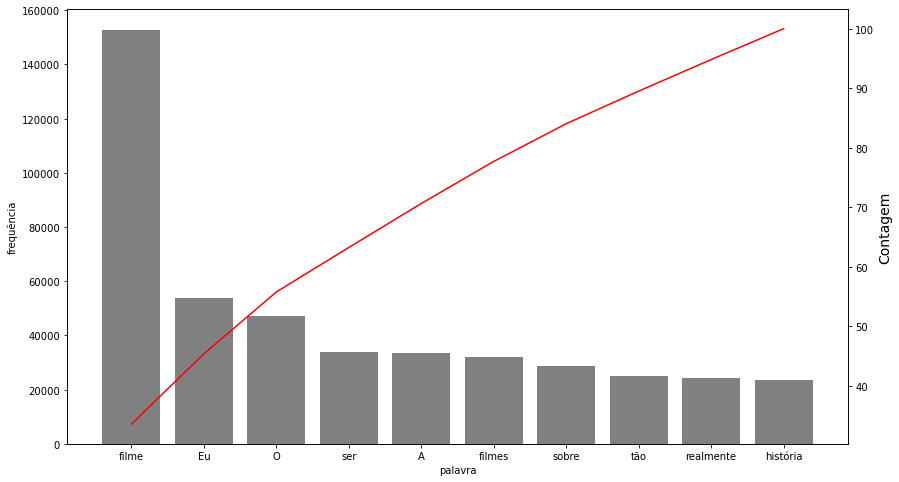

In [29]:
pareto(df, 'tratamento_2', 10)

In [30]:
classificar_texto(df, 'tratamento_2', 'classificacao')

0.681196926809543

### Removendo os acentos de todas as palavras, isso auxilia a classificação corrigindo erros ortográficos

In [31]:
import unidecode

acentos = 'ótimo péssimo não é tão'
teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao e tao'

In [32]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [33]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

df['tratamento_3'] = sem_acentos

def filter_words(opiniao):
    return ' '.join([ palavra for palavra in token_pontuacao.tokenize(opiniao) if palavra not in pontuacao_stopwords])

df['tratamento_3'] = df['tratamento_3'].apply(filter_words)
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [34]:
acuracia_tratamento_3 = classificar_texto(df, 'tratamento_3', 'classificacao')
acuracia_tratamento_3

0.6810351799433886

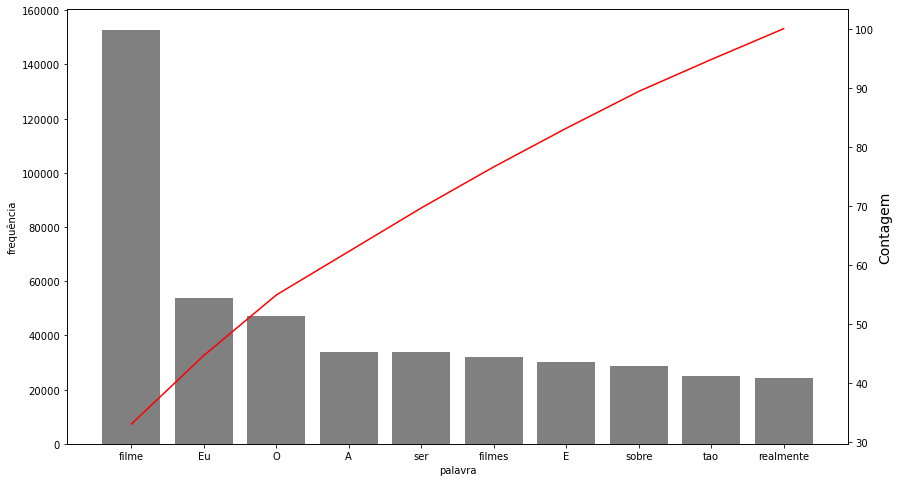

In [35]:
pareto(df, 'tratamento_3', 10)

### Convertendo todas as opiniões em letras **minusculas**, normaliza todos os textos, fazendo, por exemplo, com que palavras do início de frases se tornem minúsculas também.

In [36]:
def filter_words(opiniao):
    return ' '.join([ palavra for palavra in token_pontuacao.tokenize(opiniao.lower()) if palavra not in pontuacao_stopwords])

df['tratamento_4'] = df['tratamento_3'].apply(filter_words)
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [37]:
acuracia_tratamento_4 = classificar_texto(df, 'tratamento_4', 'classificacao')
acuracia_tratamento_4

0.6913061059441973

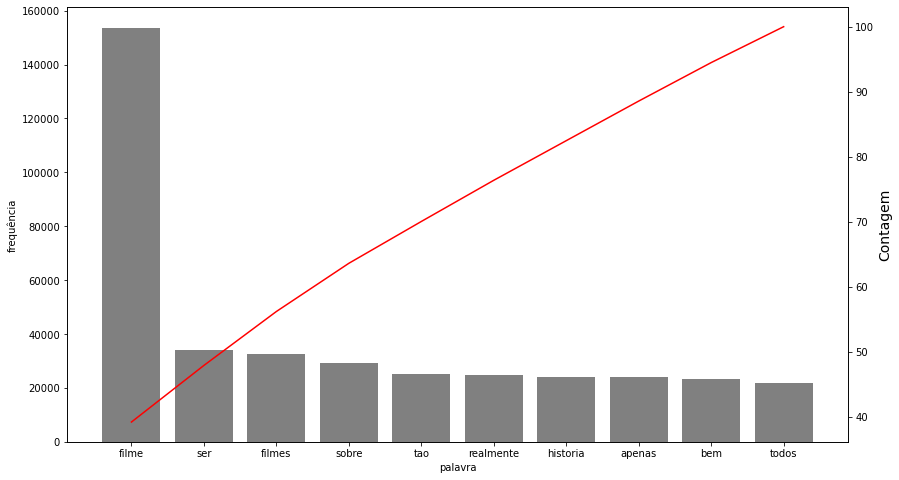

In [38]:
pareto(df, 'tratamento_4', 10)

### Aplicando o stemmer, técnica que envolve remover os sufixos das palavras

Stemming é a técnica que transforma as flexões de uma palavra em um núcleo comum (tronco), por exemplo (Correr, Corredor) -> (Corr, Corr). Essa técnica normaliza as palavras de forma a evitar suas flexões e derivações.

http://www.inf.ufrgs.br/~viviane/rslp/

http://www.nltk.org/howto/portuguese_en.html

In [40]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('corre')

'corr'

In [41]:
stemmer.stem('correria')

'corr'

In [45]:
def filter_words(opiniao):
    return ' '.join([ stemmer.stem(palavra) for palavra in token_pontuacao.tokenize(opiniao)])

df['tratamento_5'] = df['tratamento_4'].apply(filter_words)
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [48]:
acuracia_tratamento_5 = classificar_texto(df, 'tratamento_5', 'classificacao')
print(acuracia_tratamento_5)
print(acuracia_tratamento_4)

0.7001213101496159
0.6913061059441973


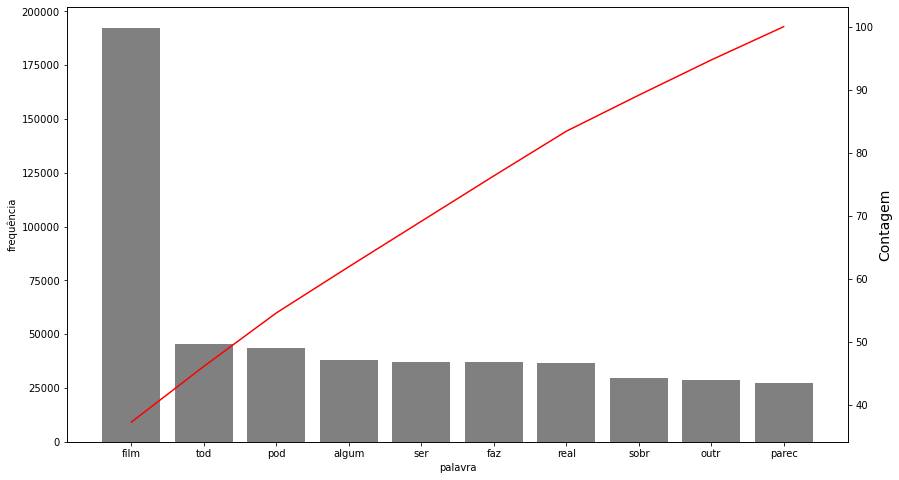

In [49]:
pareto(df, 'tratamento_5', 10)

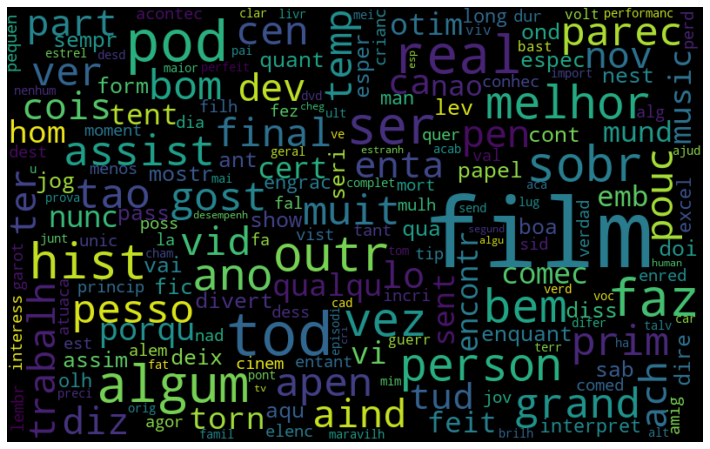

In [50]:
gera_nuvem_palavra(df, 'tratamento_5', 'pos')

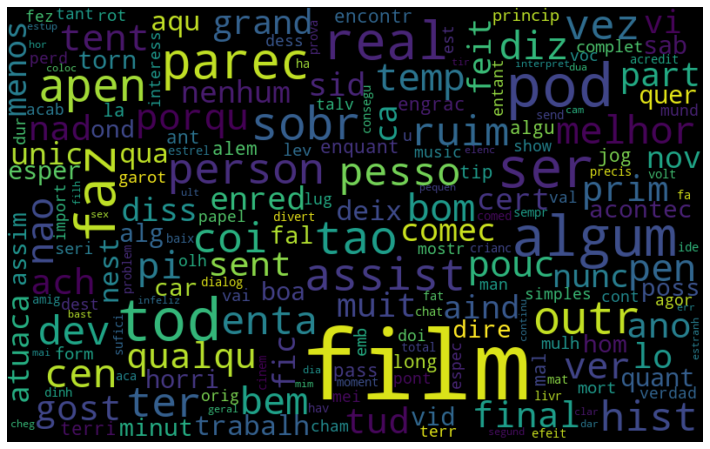

In [51]:
gera_nuvem_palavra(df, 'tratamento_5', 'neg')

## Aplicando TF-IDF

In [56]:
frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names())

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [57]:
tfidf_bruto = tfidf.fit_transform(df['text_pt'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_bruto, df['classificacao'], random_state=42)

regressao_logistica.fit(X_train, y_train)
acuracia_tfidf_bruto = regressao_logistica.score(X_test, y_test)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [58]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_tratados, df['classificacao'], random_state=42)

regressao_logistica.fit(X_train, y_train)
acuracia_tfidf_tratados = regressao_logistica.score(X_test, y_test)
print(acuracia_tfidf_tratados)

0.7003639304488476


## Aplicando ngrams

In [63]:
frase = 'Assisti um filme ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
print(*pares)

('Assisti', 'um') ('um', 'filme') ('filme', 'ótimo')


In [76]:
frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']
tdidf_teste = TfidfVectorizer(ngram_range=(2,3))
tdidf_teste.fit_transform(frases)
print(tdidf_teste.vocabulary_)

{'assisti um': 0, 'um filme': 4, 'filme ótimo': 3, 'assisti um filme': 1, 'um filme ótimo': 6, 'filme péssimo': 2, 'um filme péssimo': 5}


In [87]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, df['classificacao'], random_state=42)

regressao_logistica.fit(X_train, y_train)
acuracia_tfidf_ngrams = regressao_logistica.score(X_test, y_test)
print(acuracia_tfidf_ngrams)

0.8867771936918722


In [77]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, df['classificacao'], random_state=42)

regressao_logistica.fit(X_train, y_train)
acuracia_tfidf = regressao_logistica.score(X_test, y_test)
print(acuracia_tfidf)

0.8841892438334007


In [88]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,
                     index = tfidf.get_feature_names())



In [91]:
pesos.nlargest(30,0)

,0
otim,9.879241
excel,8.975926
perfeit,6.898187
maravilh,6.272574
favorit,5.867189
incri,5.741764
divert,5.438325
brilh,4.829062
ador,4.549729
hoj,4.489993


In [90]:
pesos.nsmallest(30,0)

,0
ruim,-11.691487
pi,-11.371862
horri,-9.642102
terri,-8.362366
chat,-7.480128
nad,-7.420820
parec,-6.621870
nenhum,-6.249077
tent,-5.775731
mal,-5.673391


In [86]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf_sem_tratamento = tfidf.fit_transform(df['text_pt'])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf_sem_tratamento, df['classificacao'], random_state=42)

regressao_logistica1 = LogisticRegression(max_iter=10000)
regressao_logistica1.fit(X_train, y_train)
acuracia_tfidf_sem_tratamento = regressao_logistica1.score(X_test, y_test)
print(acuracia_tfidf_sem_tratamento)

0.8897695107157298
